In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu

In [3]:
ls osu_log_pleiades/pt2pt/run1/rdma/

bibw.log     bw.log       latency.log


In [4]:
def read_osu_all_runs(suffix, prefix='osu_log_pleiades/pt2pt/', runs=10):
    file_list = [
        prefix + 'run{}'.format(i) + suffix for i in range(1, 11)
    ]
    df = read_osu_log_multi(file_list, skiprows=2)
    return df

def stats(df):
    # similar to df.T.describe().T
    return df.apply(['mean', 'std', 'median', 'min', 'max'], axis=1)

In [5]:
lat_rdma = read_osu_all_runs('/rdma/latency.log')
stats(lat_rdma)

,mean,std,median,min,max
0,2.596,0.143077,2.600,2.34,2.86
1,2.595,0.129808,2.590,2.38,2.88
2,2.570,0.107703,2.560,2.42,2.74
4,2.687,0.125082,2.700,2.50,2.88
8,2.533,0.170362,2.455,2.35,2.82
16,2.693,0.143608,2.710,2.43,2.91
32,2.693,0.143531,2.670,2.53,3.00
64,2.826,0.157847,2.770,2.61,3.06
128,3.247,0.105204,3.265,3.01,3.39
256,3.331,0.165962,3.290,3.09,3.61


In [6]:
lat_tcp = read_osu_all_runs('/tcp/latency.log')
stats(lat_tcp)

,mean,std,median,min,max
0,11.587,0.594158,11.555,10.32,12.42
1,11.542,0.537604,11.505,10.49,12.42
2,11.532,0.481659,11.520,10.77,12.31
4,11.522,0.502699,11.365,10.99,12.56
8,11.505,0.500272,11.505,10.46,12.07
16,11.403,0.511882,11.360,10.53,12.27
32,12.896,0.620219,12.865,11.99,14.12
64,12.869,0.544395,12.810,11.88,13.73
128,42.626,2.031536,42.420,39.47,46.32
256,42.742,1.964845,42.540,39.71,46.08


In [7]:
lat_list = [lat_rdma, lat_tcp]
mpi_cases = ['Native RDMA', 'TCP']

lat_mean_all = pd.concat([df.mean(axis=1) for df in lat_list], keys=mpi_cases, axis=1)
lat_mean_all

,Native RDMA,TCP
size,,
0,2.596,11.587
1,2.595,11.542
2,2.570,11.532
4,2.687,11.522
8,2.533,11.505
16,2.693,11.403
32,2.693,12.896
64,2.826,12.869
128,3.247,42.626


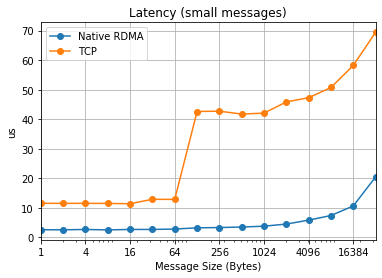

In [8]:
plot_osu(lat_mean_all[1:17], x_freq=2)
plt.title('Latency (small messages)')
plt.ylabel('us');

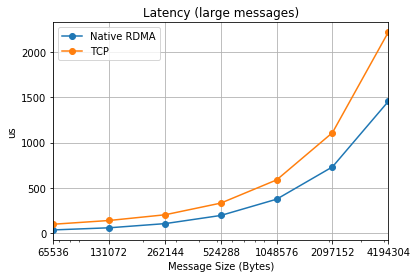

In [9]:
plot_osu(lat_mean_all[17:], x_freq=1)
plt.title('Latency (large messages)')
plt.ylabel('us');

# Bandwidth

In [10]:
bw_rdma = read_osu_all_runs('/rdma/bw.log')
stats(bw_rdma)

,mean,std,median,min,max
1,3.422,0.549379,3.740,2.30,3.84
2,6.667,0.766058,6.900,5.22,7.44
4,13.701,1.259404,14.315,11.24,14.83
8,26.666,3.588962,27.680,18.14,29.83
16,53.566,5.633975,56.025,42.11,57.65
32,103.726,11.041386,110.010,84.79,112.36
64,207.535,28.460411,219.395,132.09,223.02
128,433.743,15.294893,436.025,398.20,449.82
256,862.402,32.427476,870.865,775.82,885.52
512,1413.683,53.931790,1423.690,1317.73,1496.23


In [11]:
bw_tcp = read_osu_all_runs('/tcp/bw.log')
stats(bw_tcp)

,mean,std,median,min,max
1,0.285,0.027988,0.285,0.25,0.33
2,0.633,0.076601,0.675,0.50,0.71
4,1.267,0.148776,1.335,1.01,1.42
8,2.564,0.296056,2.705,2.07,2.84
16,5.070,0.582771,5.345,4.16,5.69
32,9.391,1.225311,9.510,7.18,10.99
64,18.752,2.307008,19.050,14.64,22.01
128,9.690,0.985066,9.755,8.02,11.13
256,19.379,2.141933,19.575,16.13,22.60
512,38.296,3.663775,38.885,32.24,43.43


In [12]:
bw_list = [bw_rdma, bw_tcp]
mpi_cases = ['Native RDMA', 'TCP']

bw_mean_all = pd.concat([df.mean(axis=1) for df in bw_list], keys=mpi_cases, axis=1)
bw_mean_all

,Native RDMA,TCP
size,,
1,3.422,0.285
2,6.667,0.633
4,13.701,1.267
8,26.666,2.564
16,53.566,5.070
32,103.726,9.391
64,207.535,18.752
128,433.743,9.690
256,862.402,19.379


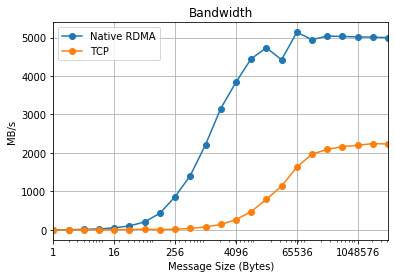

In [13]:
plot_osu(bw_mean_all)
plt.title('Bandwidth')
plt.ylabel('MB/s');

# Bi-directional bandwidth

In [14]:
bibw_rdma = read_osu_all_runs('/rdma/bibw.log')
stats(bibw_rdma)

,mean,std,median,min,max
1,5.022,0.258276,5.100,4.36,5.23
2,10.126,0.327047,10.140,9.36,10.48
4,19.890,1.390723,20.395,16.00,20.68
8,39.449,1.542930,39.975,35.91,40.97
16,76.969,1.322308,77.355,73.98,78.37
32,150.803,2.108480,151.525,147.02,153.63
64,303.820,8.379504,307.285,283.45,311.52
128,586.275,20.325292,593.090,537.30,599.09
256,1077.240,71.405659,1103.640,921.56,1135.99
512,1972.083,76.978850,1987.385,1812.86,2061.38


In [15]:
bibw_tcp = read_osu_all_runs('/tcp/bibw.log')
stats(bibw_tcp)

,mean,std,median,min,max
1,0.445,0.044783,0.450,0.35,0.51
2,0.910,0.106875,0.915,0.69,1.03
4,1.859,0.241728,1.850,1.39,2.17
8,3.679,0.455179,3.620,2.72,4.18
16,7.357,0.891342,7.220,5.57,8.46
32,12.214,1.229148,12.185,9.80,13.61
64,24.799,2.390311,24.560,19.76,28.40
128,11.422,0.979544,11.565,9.44,12.61
256,22.666,1.858555,22.660,18.75,24.85
512,43.337,3.907981,43.025,36.95,49.27


In [16]:
bw_list = [bw_rdma, bw_tcp]
mpi_cases = ['Native RDMA', 'TCP']

bw_mean_all = pd.concat([df.mean(axis=1) for df in bw_list], keys=mpi_cases, axis=1)
bw_mean_all

,Native RDMA,TCP
size,,
1,3.422,0.285
2,6.667,0.633
4,13.701,1.267
8,26.666,2.564
16,53.566,5.070
32,103.726,9.391
64,207.535,18.752
128,433.743,9.690
256,862.402,19.379


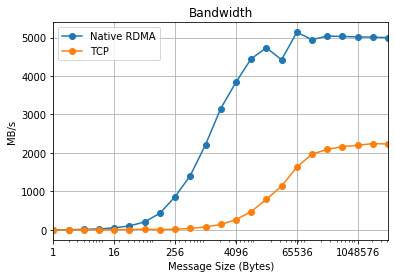

In [17]:
plot_osu(bw_mean_all)
plt.title('Bandwidth')
plt.ylabel('MB/s');

In [18]:
bibw_list = [bibw_rdma, bibw_tcp]
mpi_cases = ['Native RDMA', 'TCP']

bibw_mean_all = pd.concat([df.mean(axis=1) for df in bibw_list], keys=mpi_cases, axis=1)
bibw_mean_all

,Native RDMA,TCP
size,,
1,5.022,0.445
2,10.126,0.910
4,19.890,1.859
8,39.449,3.679
16,76.969,7.357
32,150.803,12.214
64,303.820,24.799
128,586.275,11.422
256,1077.240,22.666


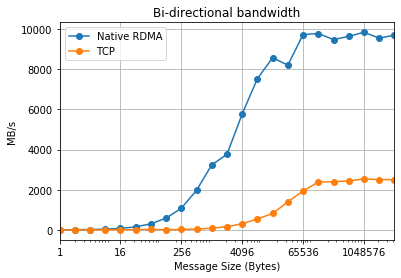

In [19]:
plot_osu(bibw_mean_all)
plt.title('Bi-directional bandwidth')
plt.ylabel('MB/s');